In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import csv

data = pd.read_csv(r'C:\Users\pdutt\Downloads\diabetes.csv')


In [3]:
str(data)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape


(768, 9)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
data['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [10]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [11]:
data['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [12]:
#data.isnull().sum
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

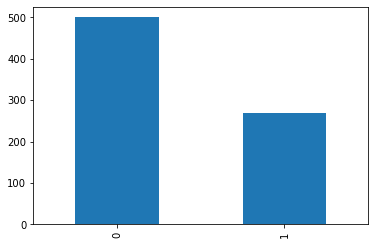

In [13]:
data['Outcome'].value_counts().plot(kind='bar');

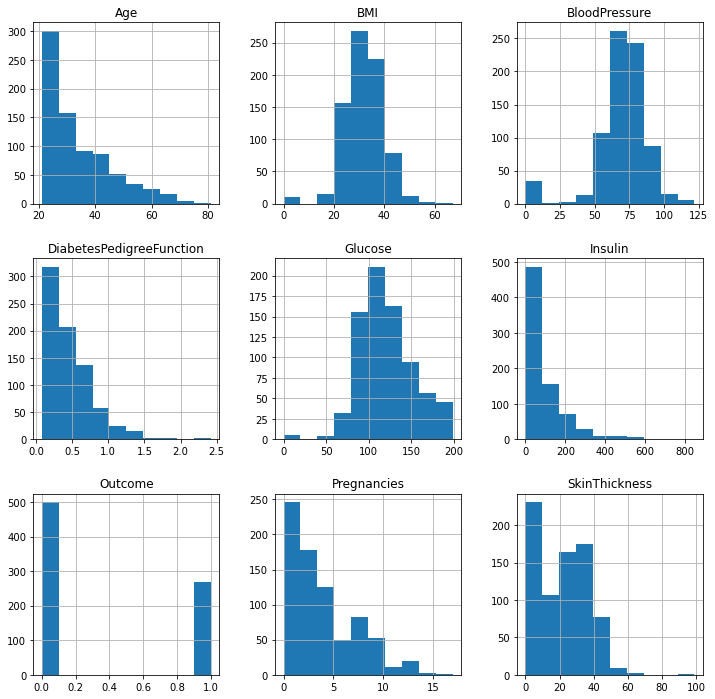

In [14]:
data.hist(figsize=(12,12));


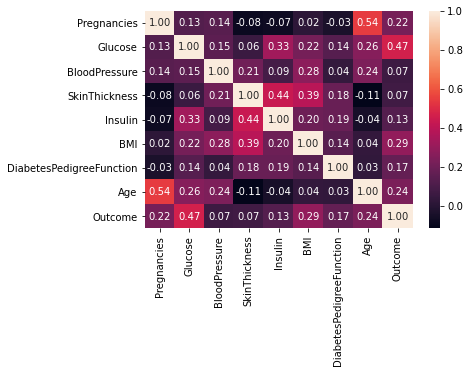

In [15]:
sns.heatmap(data.corr(), annot=True, fmt=".2f");


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


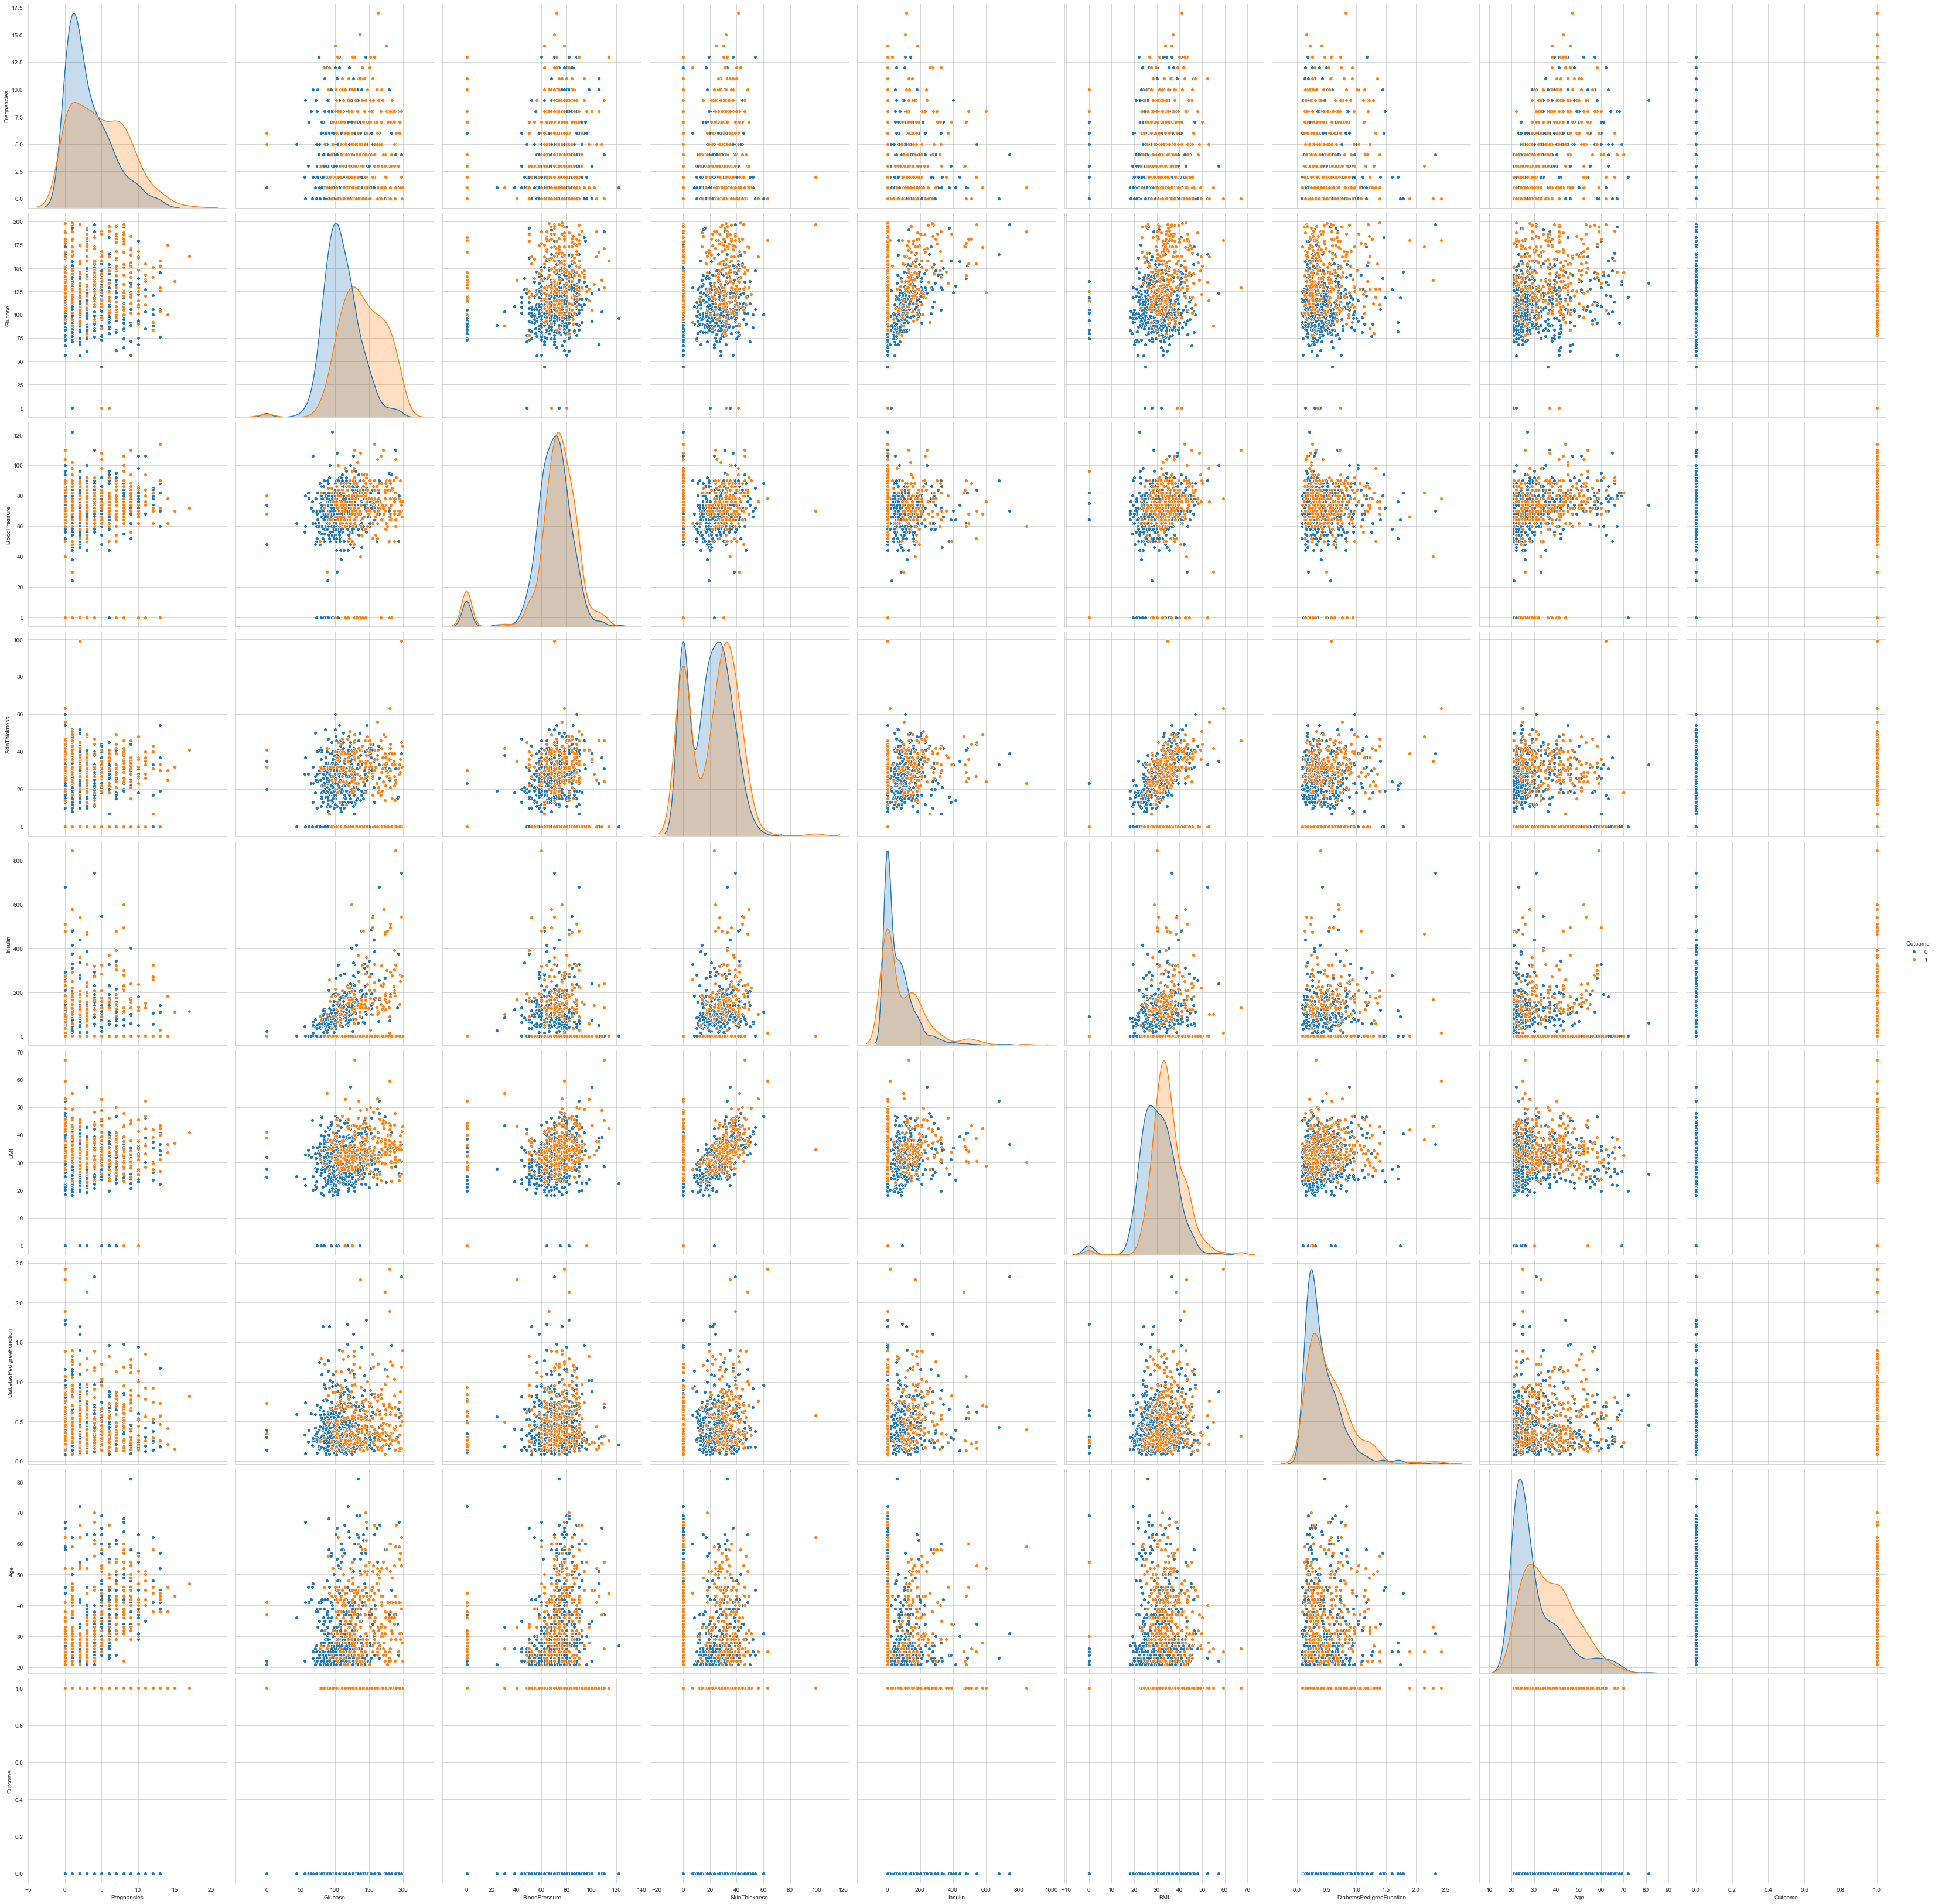

In [16]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(data,vars=data.columns, hue="Outcome", height=5);
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [18]:
y=data['Outcome']
x=data.drop(['Outcome'],axis=1)

<h1>Decision Tree Classifier </h1>

accuracy = 0.7344
f1 = 0.7378
precision = 0.7432
recall = 0.7344
No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.711


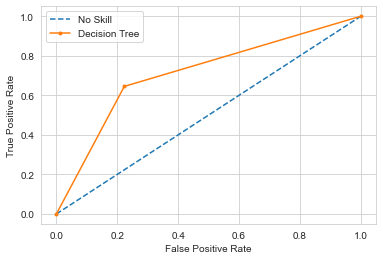

In [19]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
model.score(test_x,test_y)
predicted = model.predict(test_x)
accuracy=round(accuracy_score(test_y,predicted,),4)
f1=round(f1_score(test_y,predicted, average='weighted'),4)
precision=round(precision_score(test_y,predicted,average='weighted'),4)
recall=round(recall_score(test_y,predicted,average='weighted'),4)

print("accuracy = "+accuracy.astype(str))
print("f1 = "+f1.astype(str))
print("precision = "+precision.astype(str))
print("recall = "+recall.astype(str))



ns_probs = [0 for _ in range(len(test_y))]
lr_probs = model.predict_proba(test_x)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


<h1> Logistic Regression </h1>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy = 0.7917
f1 = 0.7864
precision = 0.7859
recall = 0.7917
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.861


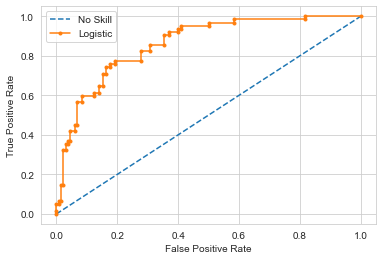

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)
model.score(test_x,test_y)
predicted = model.predict(test_x)
accuracy=round(accuracy_score(test_y,predicted,),4)
f1=round(f1_score(test_y,predicted, average='weighted'),4)
precision=round(precision_score(test_y,predicted,average='weighted'),4)
recall=round(recall_score(test_y,predicted,average='weighted'),4)

print("accuracy = "+accuracy.astype(str))
print("f1 = "+f1.astype(str))
print("precision = "+precision.astype(str))
print("recall = "+recall.astype(str))



ns_probs = [0 for _ in range(len(test_y))]
lr_probs = model.predict_proba(test_x)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()



<h1>Support Vector Machines</h1>

accuracy = 0.7812
f1 = 0.7729
precision = 0.7742
recall = 0.7812
No Skill: ROC AUC=0.500
SVC: ROC AUC=0.842


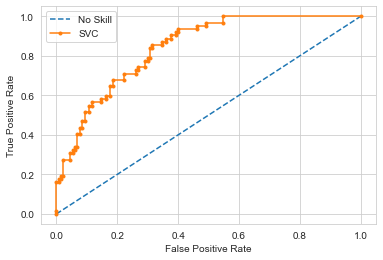

In [21]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
model=SVC()
clf = CalibratedClassifierCV(model)
clf.fit(train_x,train_y)
clf.score(test_x,test_y)
predicted = clf.predict(test_x)
accuracy=round(accuracy_score(test_y,predicted,),4)
f1=round(f1_score(test_y,predicted, average='weighted'),4)
precision=round(precision_score(test_y,predicted,average='weighted'),4)
recall=round(recall_score(test_y,predicted,average='weighted'),4)

print("accuracy = "+accuracy.astype(str))
print("f1 = "+f1.astype(str))
print("precision = "+precision.astype(str))
print("recall = "+recall.astype(str))

ns_probs = [0 for _ in range(len(test_y))]
lr_probs = clf.predict_proba(test_x)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


<h1>Naive Bayes </h1>

accuracy = 0.7656
f1 = 0.7575
precision = 0.7572
recall = 0.7656
No Skill: ROC AUC=0.500
NB: ROC AUC=0.818


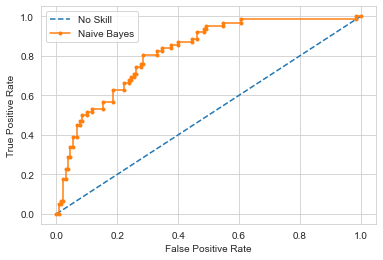

In [22]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(train_x,train_y)
model.score(test_x,test_y)
predicted = model.predict(test_x)
accuracy=round(accuracy_score(test_y,predicted,),4)
f1=round(f1_score(test_y,predicted, average='weighted'),4)
precision=round(precision_score(test_y,predicted,average='weighted'),4)
recall=round(recall_score(test_y,predicted,average='weighted'),4)

print("accuracy = "+accuracy.astype(str))
print("f1 = "+f1.astype(str))
print("precision = "+precision.astype(str))
print("recall = "+recall.astype(str))


ns_probs = [0 for _ in range(len(test_y))]
lr_probs = model.predict_proba(test_x)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('NB: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


<h1>Linear Discriminant Analysis </h1>

accuracy = 0.8021
f1 = 0.7945
precision = 0.797
recall = 0.8021
No Skill: ROC AUC=0.500
LDA: ROC AUC=0.860


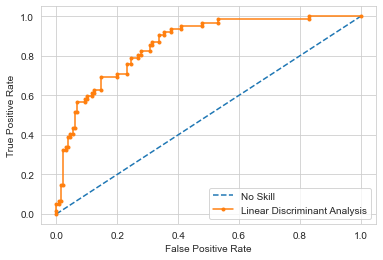

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model=LinearDiscriminantAnalysis()
model.fit(train_x,train_y)
model.score(test_x,test_y)
predicted = model.predict(test_x)
accuracy=round(accuracy_score(test_y,predicted,),4)
f1=round(f1_score(test_y,predicted, average='weighted'),4)
precision=round(precision_score(test_y,predicted,average='weighted'),4)
recall=round(recall_score(test_y,predicted,average='weighted'),4)

print("accuracy = "+accuracy.astype(str))
print("f1 = "+f1.astype(str))
print("precision = "+precision.astype(str))
print("recall = "+recall.astype(str))

ns_probs = [0 for _ in range(len(test_y))]
lr_probs = model.predict_proba(test_x)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LDA: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Linear Discriminant Analysis')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()




<h1>KNN Classifier</h1>

accuracy = 0.7552
f1 = 0.7524
precision = 0.7506
recall = 0.7552
No Skill: ROC AUC=0.500
KNN: ROC AUC=0.760


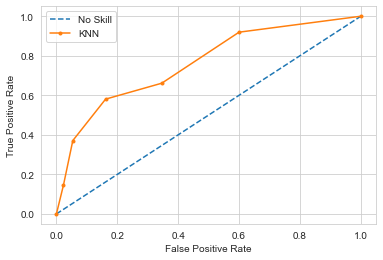

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(train_x,train_y)
model.score(test_x,test_y)
predicted = model.predict(test_x)
accuracy=round(accuracy_score(test_y,predicted,),4)
f1=round(f1_score(test_y,predicted, average='weighted'),4)
precision=round(precision_score(test_y,predicted,average='weighted'),4)
recall=round(recall_score(test_y,predicted,average='weighted'),4)

print("accuracy = "+accuracy.astype(str))
print("f1 = "+f1.astype(str))
print("precision = "+precision.astype(str))
print("recall = "+recall.astype(str))


ns_probs = [0 for _ in range(len(test_y))]
lr_probs = model.predict_proba(test_x)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


<h1>Random Forest Classifier</h1>

accuracy = 0.7865
f1 = 0.7829
precision = 0.7816
recall = 0.7865
No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.848


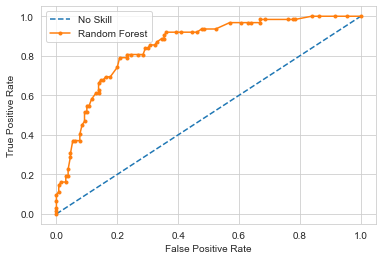

In [25]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(train_x,train_y)
model.score(test_x,test_y)
predicted = model.predict(test_x)
accuracy=round(accuracy_score(test_y,predicted,),4)
f1=round(f1_score(test_y,predicted, average='weighted'),4)
precision=round(precision_score(test_y,predicted,average='weighted'),4)
recall=round(recall_score(test_y,predicted,average='weighted'),4)

print("accuracy = "+accuracy.astype(str))
print("f1 = "+f1.astype(str))
print("precision = "+precision.astype(str))
print("recall = "+recall.astype(str))



ns_probs = [0 for _ in range(len(test_y))]
lr_probs = model.predict_proba(test_x)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
